# Machine Learning Unsupervised

##  Spectral Clustering

__Goal:__
The purpose of this notebook is to learn how to use an unsupervised learning algorithm, **SpectralClustering** using sklearn.   

__At the end of this notebook you will be able to:__
> 1. Run a spectral clustering algorithm.
> 2. Understand how you can configure the algorithm.
> 3. Understand when you could apply the algorithm

### Overview Spectral Clustering

Spectral clustering is a method based on a combination of graph and linear algebra principles. It clusters based on connectivity. K-means is a cluster methodology based on compactness. Compactnes requires that points are closely together if they lie in the same cluster and the points are clustered around the center. This is not always a good approach in case of weird shapes. We can also cluster based on connectivity. Connectivity assumes a connection within a group. The spectral cluster method is such a cluster method. It is based on undirected Graph principles. 


![image](spectral.png)



If two nodes (Vi, Vj) are connected they the agency matrix W value is 1, if they are not connected the agency matrix W value is 0. In spectral clustering an Afinity Matrix is used. It is similar to agency matrix W but allows non binary relations. We compute the similarity of two points based on the afinity and if it is large it is defined as connected, otherwise not connected. (See for affinities in documentation). Next we compute matrix D based on the number of connections of each point. If we have A and D we can compute Laplace matrix and the eigenvectors to be used for clustering.

Mathematical objects
- Similarity or afinity graph matrix A 
- Graph laplace matrix L (computed with Afinity Matrix and D matrix)
- Eigenvectors U

Steps of the algorithm

- 1 Construction of affinity graph -> afinity matrix A
- 2 Construction of Laplace matrix L
- 3 computation eigenvectors U as k lowest eigenvalues of L
- 4 yi = ith row of U
- 5 clusterization of y's in clusters 


See also :https://spin.atomicobject.com/2021/09/07/spectral-clustering/


In this notebook we will use the k-means on weird shaped clusters and we compare it with spectral clustering

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.colors as mcolors

In [11]:
# helper function to color clusters
plt.rcParams['figure.figsize'] = [8,8]
def display_cluster(X,km,num_clusters, ax=plt):
    #color = 'brgcmkyw'
    color = list(mcolors.TABLEAU_COLORS.values())
    for i in range(num_clusters):
        #plot the datapoints in the color of the label
        ax.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = 0.4, s = 10)
        #plot the centroid
        ax.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], 
                    marker = '^', s = 300, alpha = 1)

# Generate sample data

First we are going to generate some sample data for demonstration purpose. We will create a dataset with two features `n_features=2` and 1000 observations `n_samples = 1000`

In [12]:
n_samples = 1000
random_state = 170
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X, y = make_blobs(n_samples=n_samples,random_state=170)
X = np.dot(X, transformation)

In [13]:
print(X.shape)
print(X)

(1000, 2)
[[-2.57975062  0.6614393 ]
 [-3.19478285  0.46337878]
 [ 1.43719083 -1.38586826]
 ...
 [-2.70607317  2.65235186]
 [-2.76255098  2.75491924]
 [-0.50792162  1.53719647]]


Next we plot feature 1 against feature 2

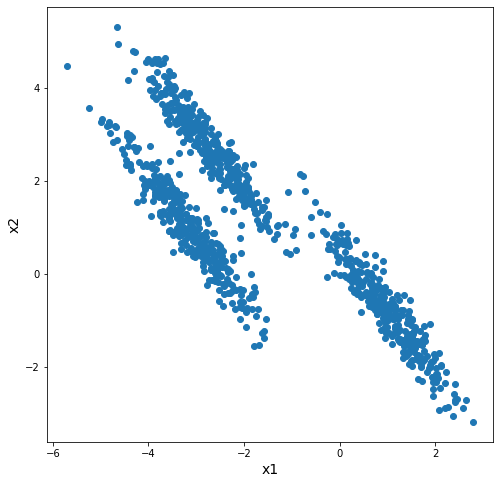

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
plt.show()

We observe three clusters. Let's run the kmeans

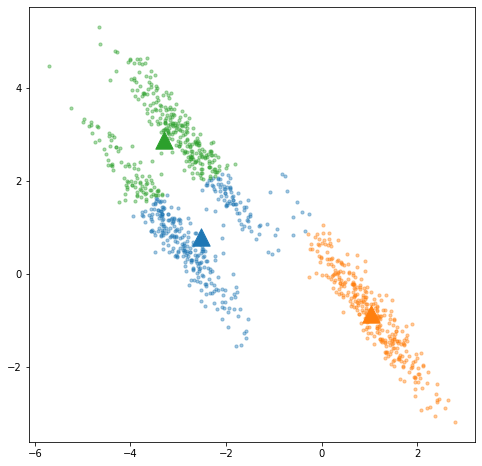

In [6]:
#Let's run K-means with 3 clusters.
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

# Spectral clustering

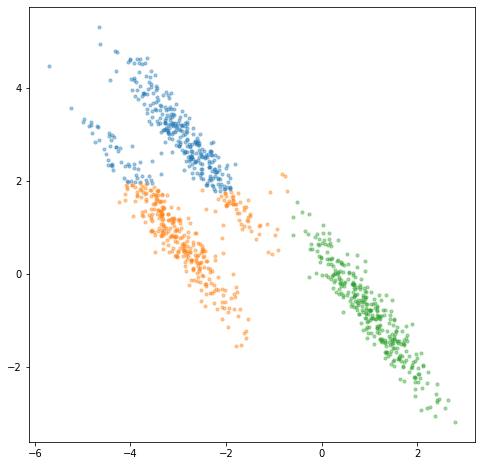

In [8]:
#let's run SpectalClustering (default affinity rbf - radial basis function)
#see https://en.wikipedia.org/wiki/Radial_basis_function_kernel
from sklearn.cluster import SpectralClustering
m = SpectralClustering(n_clusters=3).fit(X)
#plot
color = list(mcolors.TABLEAU_COLORS.values())
for i in range(3):
    #plot the datapoints in the color of the label
    plt.scatter(X[m.labels_==i,0],X[m.labels_==i,1],c = color[i],alpha = 0.4, s = 10)

This does not help much. We need another affinity method

## k-nearest neighbor Afinity
The k-nearest neighbor Afinity works well with weird shapes. In k-nearest neighbor we require (in case of two points Vi, Vj) Vi, to be amongst the nearest neighbor of Vj and visa versa. We could also choose a gausian kernel or epsilon-nearest kernel, but these are less robust



In [11]:
#let's run SpectalClustering using nearest neighbor

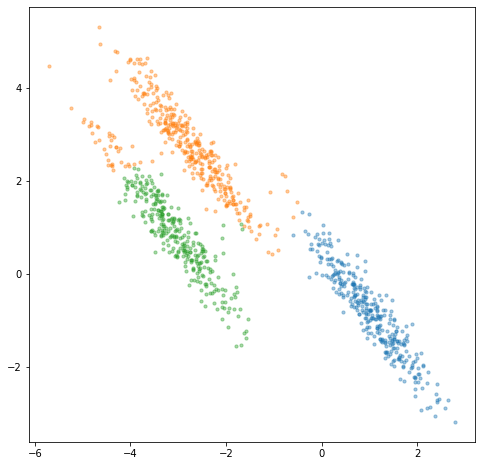

In [9]:
# create instance and fit
m = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10).fit(X)
#plot
color = list(mcolors.TABLEAU_COLORS.values())
for i in range(3):
    #plot the datapoints in the color of the label
    plt.scatter(X[m.labels_==i,0],X[m.labels_==i,1],c = color[i],alpha = 0.4, s = 10)

The clustering still needs some more tuning. We need to enlarge the `nearest_neighbors` since the clusters are rather large

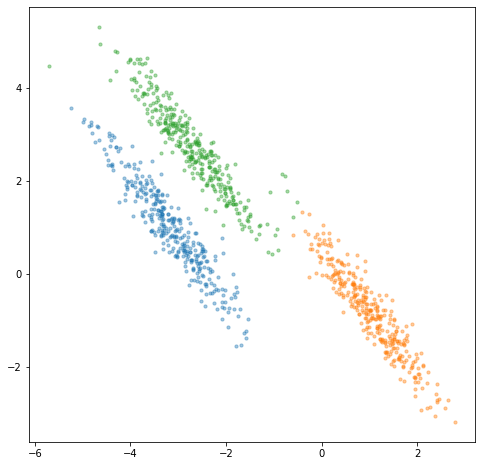

In [10]:
#let's run SpectalClustering using nearest neighbor
from sklearn.cluster import SpectralClustering
# create instance and fit
m = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=20).fit(X)
#plot
color = list(mcolors.TABLEAU_COLORS.values())
for i in range(3):
    #plot the datapoints in the color of the label
    plt.scatter(X[m.labels_==i,0],X[m.labels_==i,1],c = color[i],alpha = 0.4, s = 10)

In [14]:
SpectralClustering?